In [2]:
library(ISLR)

# Polynomial Regression and Step Functions

In [11]:
fit=lm(wage~poly(age,4),data=Wage)

#Other ways. Different coefficients but you obtain similar fitted values
#fit2=lm(wage~poly(age,4,raw=T),data=Wage)
#fit2a=lm(wage~age+I(age^2)+I(age^3)+I(age^4),data=Wage)
#fit2b=lm(wage~cbind(age,age^2,age^3,age^4),data=Wage)

In [12]:
# Create a grid of values for age at which we want predictions
agelims=range(Wage$age)
age.grid=seq(from=agelims[1],to=agelims[2])
preds=predict(fit,newdata=list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)

In [61]:
# What model to use?
fit.1=lm(wage~age,data=Wage)
fit.2=lm(wage~poly(age,2),data=Wage)
fit.3=lm(wage~poly(age,3),data=Wage)
fit.4=lm(wage~poly(age,4),data=Wage)
fit.5=lm(wage~poly(age,5),data=Wage)
anova(fit.1,fit.2,fit.3,fit.4,fit.5)
# -> Model 3 or 4

# Instead of anova, you can use
coef(summary(fit.5))
(-11.983)^2
# t-statistics^2 = F statistics of ANOVA

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


[1] 143.5923

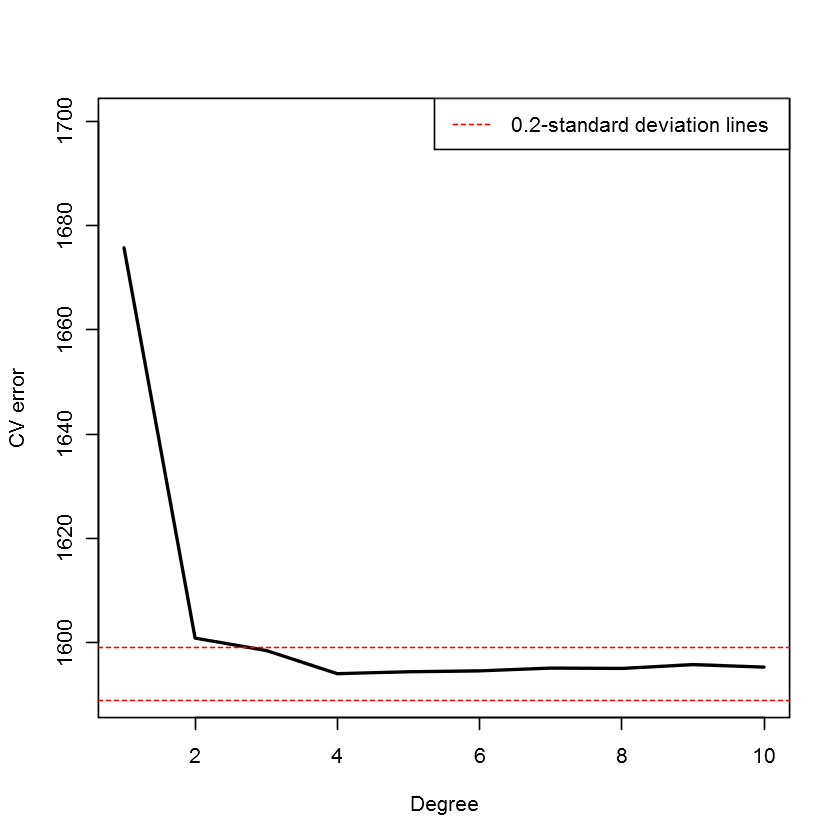

In [65]:
# Using CV
library(boot)
set.seed(1)
all.deltas = rep(NA, 10)
for (i in 1:10) {
  glm.fit = glm(wage~poly(age, i), data=Wage)
  all.deltas[i] = cv.glm(Wage, glm.fit, K=10)$delta[2]
}
plot(1:10, all.deltas, xlab="Degree", ylab="CV error", type="l", pch=20, lwd=2, ylim=c(1590, 1700))
min.point = min(all.deltas)
sd.points = sd(all.deltas)
abline(h=min.point + 0.2 * sd.points, col="red", lty="dashed")
abline(h=min.point - 0.2 * sd.points, col="red", lty="dashed")
legend("topright", "0.2-standard deviation lines", lty="dashed", col="red")

In [26]:
# Logisitic regression for wage > 250k
fit=glm(I(wage>250)~poly(age,4),data=Wage,family=binomial)
preds=predict(fit,newdata=list(age=age.grid),se=T)
pfit=exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)
se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))
preds=predict(fit,newdata=list(age=age.grid),type="response",se=T)

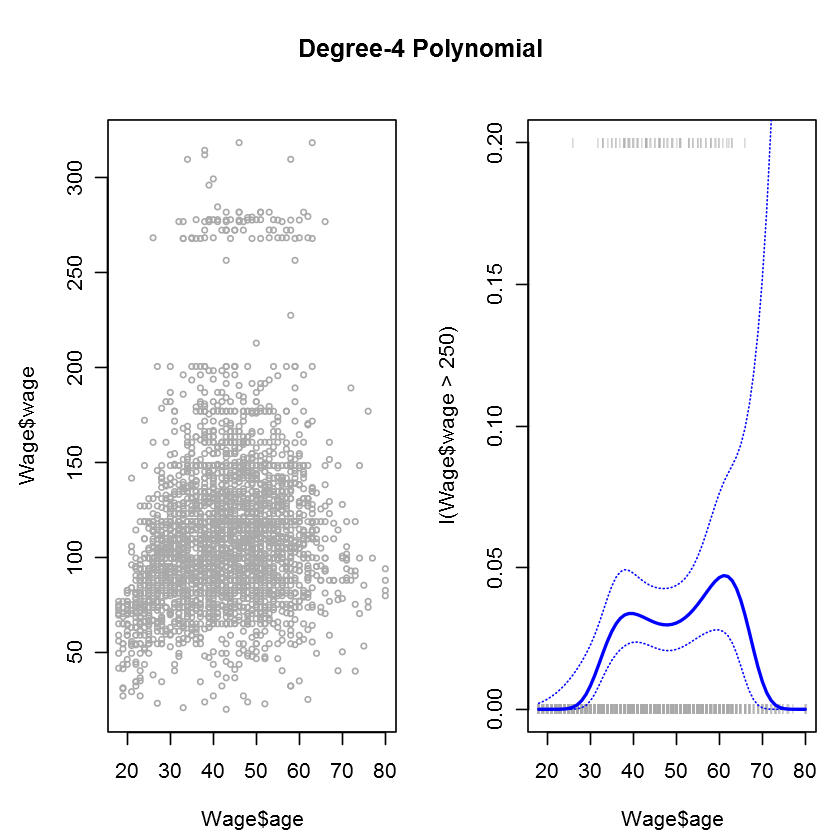

In [27]:
par(mfrow=c(1,2),mar=c(4.5,4.5,1,1),oma=c(0,0,4,0))
plot(Wage$age,Wage$wage,xlim=agelims,cex=.5,col="darkgrey")
title("Degree-4 Polynomial",outer=T)
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

plot(Wage$age,I(Wage$wage>250),xlim=agelims,type="n",ylim=c(0,.2))
points(jitter(Wage$age), I((Wage$wage>250)/5),cex=.5,pch="|",col="darkgrey")
lines(age.grid,pfit,lwd=2, col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

In [66]:
# Step functions
table(cut(Wage$age,4))
fit=lm(wage~cut(age,4),data=Wage)
coef(summary(fit))
#The age<33.5 category is left out, so the intercept coefficient of
# $94,160 can be interpreted as the average salary for those under 33.5 years
# Predictions and plots can be done just like the polynomial fit.


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


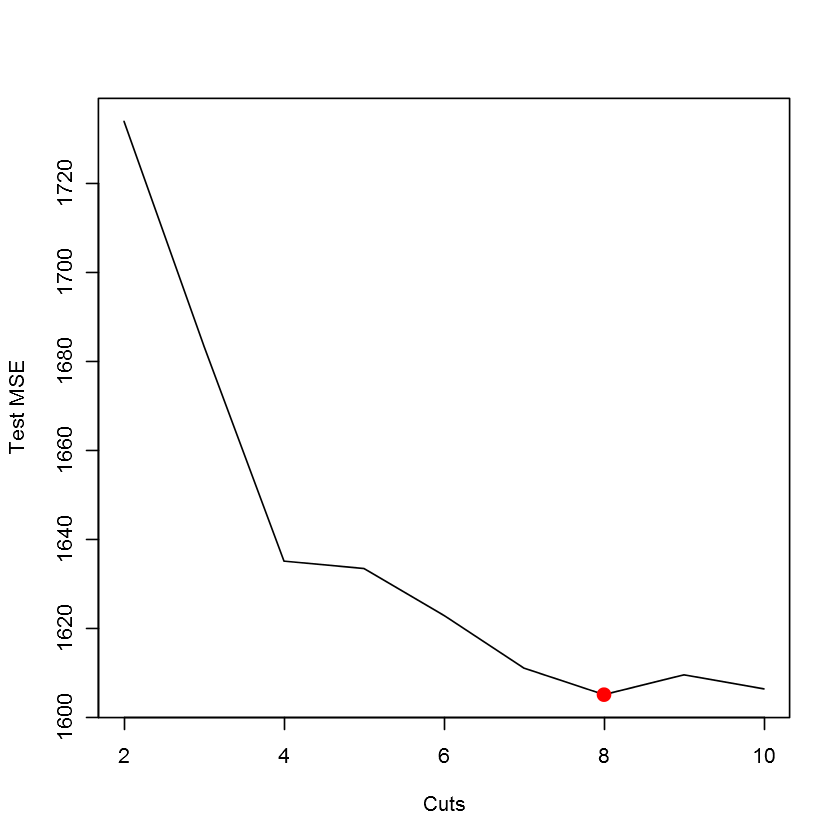

In [67]:
# Choosing the number of step with CV
cvs <- rep(NA, 10)
for (i in 2:10) {
    Wage$age.cut <- cut(Wage$age, i)
    fit <- glm(wage ~ age.cut, data = Wage)
    cvs[i] <- cv.glm(Wage, fit, K = 10)$delta[1]
}
plot(2:10, cvs[-1], xlab = "Cuts", ylab = "Test MSE", type = "l")
d.min <- which.min(cvs)
points(which.min(cvs), cvs[which.min(cvs)], col = "red", cex = 2, pch = 20)

# fit <- glm(wage ~ cut(age, 8), data = Wage)
# preds <- predict(fit, data.frame(age = age.grid))

# Splines

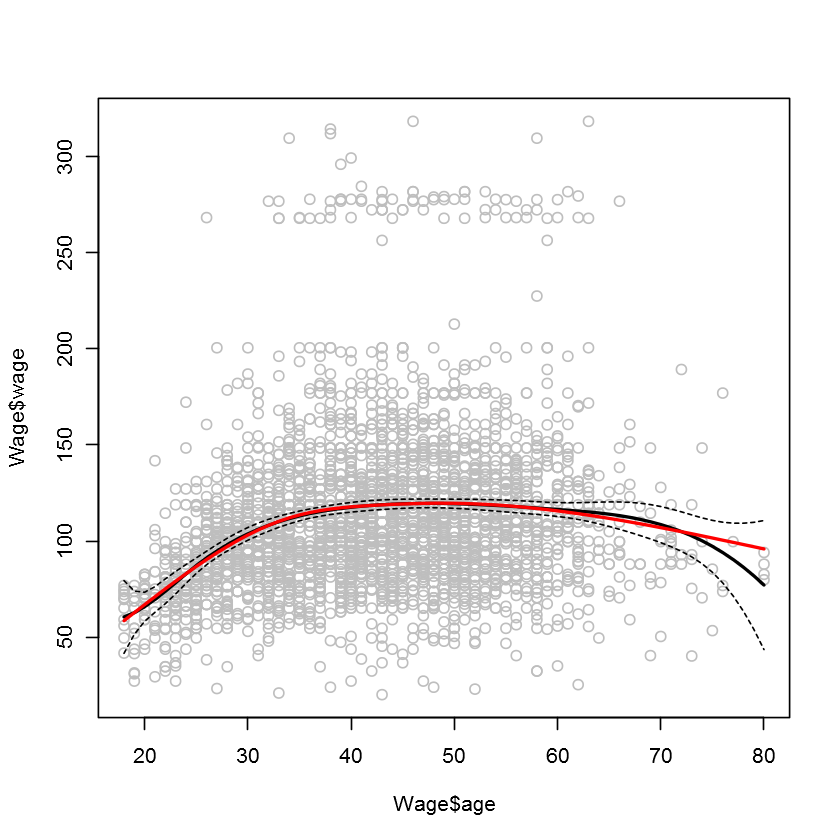

In [68]:
library(splines)

# bs() produces cubic splines by default
fit=lm(wage~bs(age,knots=c(25,40,60)),data=Wage)
pred=predict(fit,newdata=list(age=age.grid),se=T)

# ns() fit natural splines
fit2=lm(wage~ns(age,df=4),data=Wage)
pred2=predict(fit2,newdata=list(age=age.grid),se=T)

plot(Wage$age,Wage$wage,col="gray")
lines(age.grid,pred$fit,lwd=2)
lines(age.grid,pred$fit+2*pred$se,lty="dashed")
lines(age.grid,pred$fit-2*pred$se,lty="dashed")

lines(age.grid, pred2$fit,col="red",lwd=2)

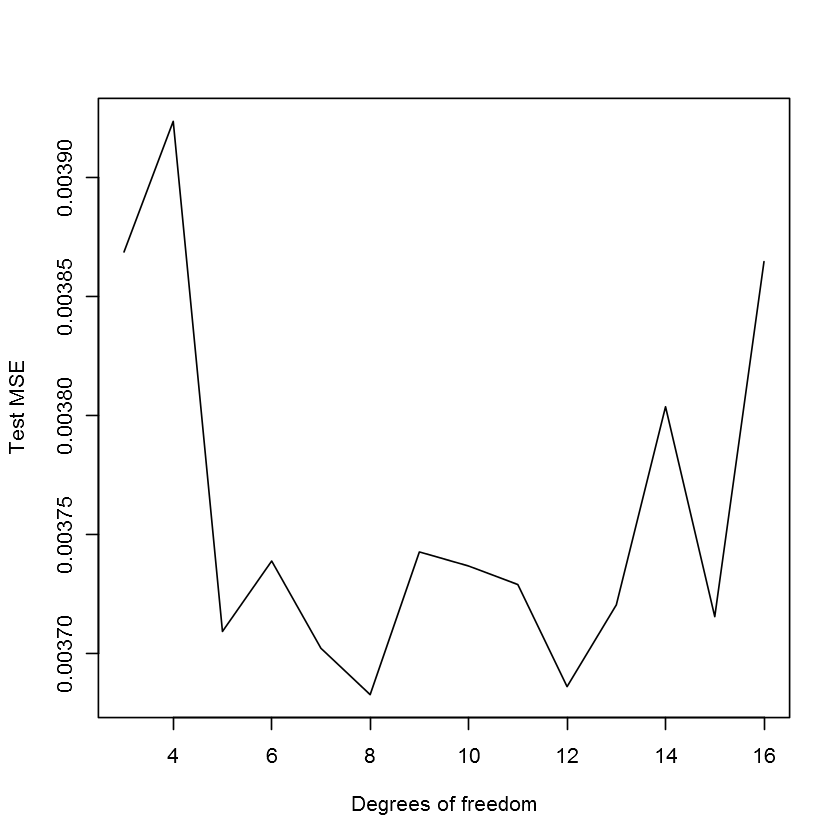

In [71]:
# Choose df with CV
library(MASS)
options(warn = -1)

cv <- rep(NA, 16)
for (i in 3:16) {
    fit <- glm(nox ~ bs(dis, df = i), data = Boston)
    cv[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}
plot(3:16, cv[-c(1, 2)], xlab = "Degrees of freedom", ylab = "Test MSE", type = "l")

Warning message in smooth.spline(Wage$age, Wage$wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"

[1] 6.794596

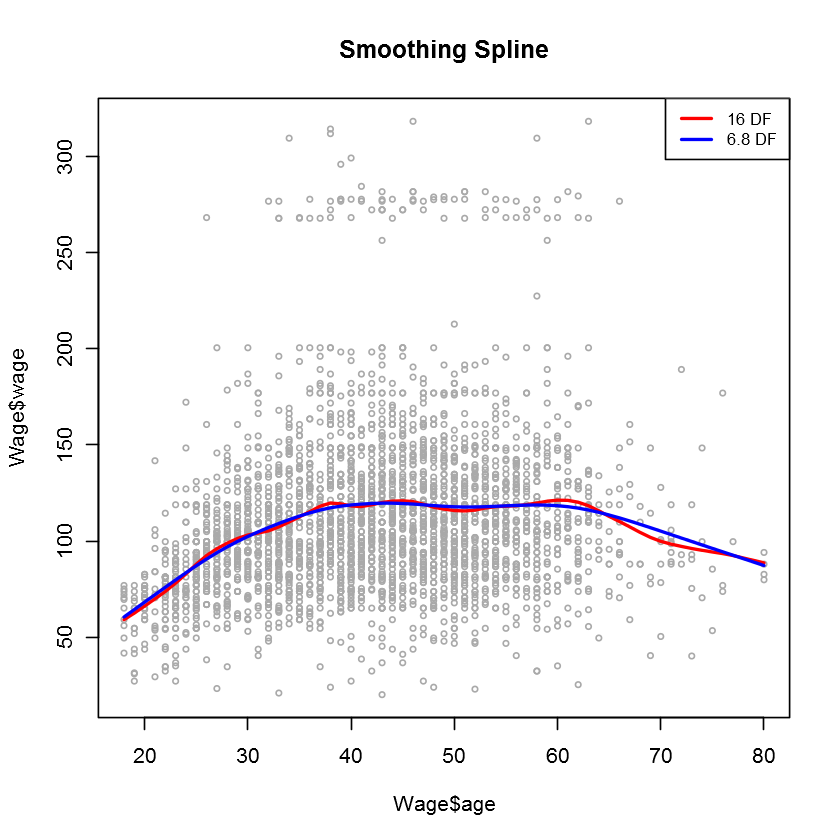

In [40]:
# Smoothing splines
fit=smooth.spline(Wage$age,Wage$wage,df=16)
fit2=smooth.spline(Wage$age,Wage$wage,cv=TRUE)
fit2$df

plot(Wage$age,Wage$wage,xlim=agelims,cex=.5,col="darkgrey")
title("Smoothing Spline")

lines(fit,col="red",lwd=2)
lines(fit2,col="blue",lwd=2)
legend("topright",legend=c("16 DF","6.8 DF"),col=c("red","blue"),
       lty=1,lwd=2,cex=.8)

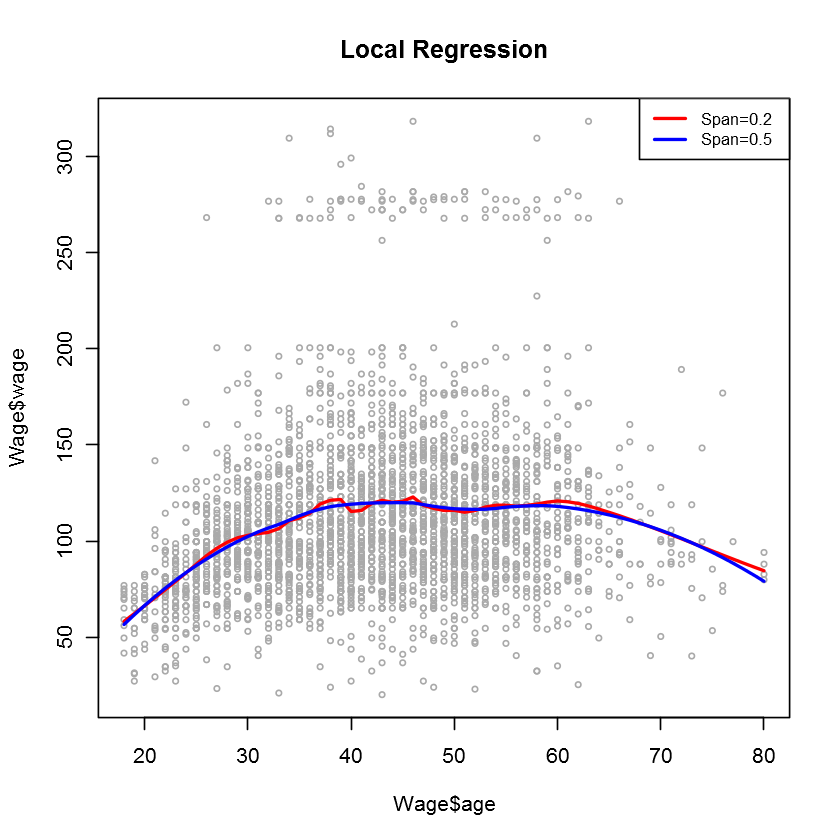

In [41]:
# Local regression
fit=loess(wage~age,span=.2,data=Wage)
fit2=loess(wage~age,span=.5,data=Wage)

plot(Wage$age,Wage$wage,xlim=agelims,cex=.5,col="darkgrey")
title("Local Regression")
lines(age.grid,predict(fit,data.frame(age=age.grid)),col="red",lwd=2)
lines(age.grid,predict(fit2,data.frame(age=age.grid)),col="blue",lwd=2)
legend("topright",legend=c("Span=0.2","Span=0.5"),col=c("red","blue"),lty=1,lwd=2,cex=.8)

# GAMs

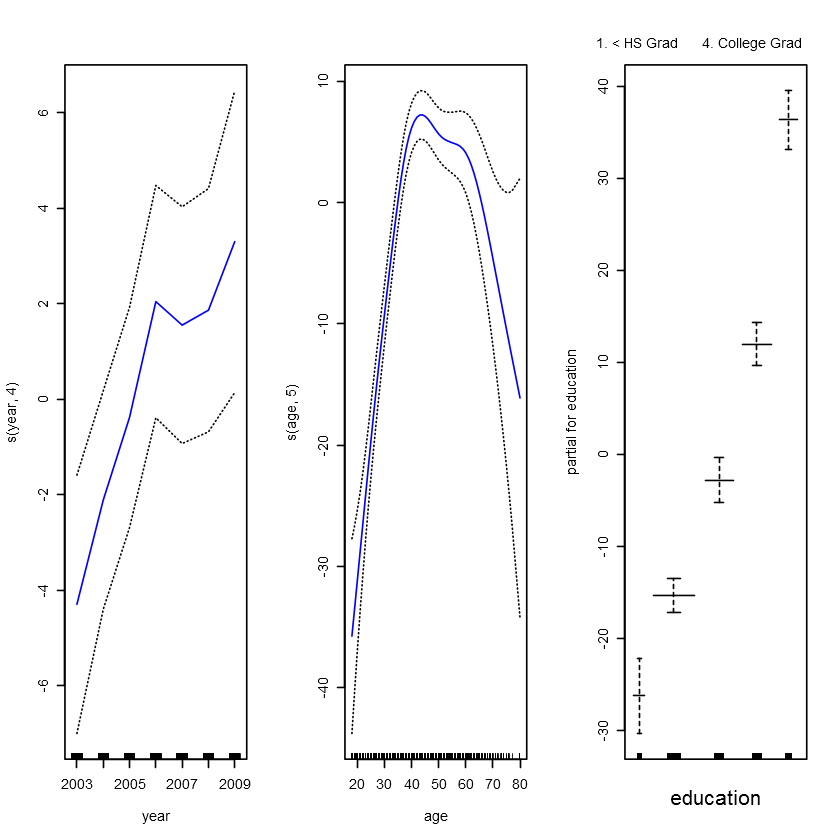

In [44]:
library(gam)

# Linear regression can be fitted with lm
gam1=lm(wage~ns(year,4)+ns(age,5)+education,data=Wage)

# s() indicate that we want a smoothing spline
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)
par(mfrow=c(1,3))
plot(gam.m3, se=TRUE,col="blue")

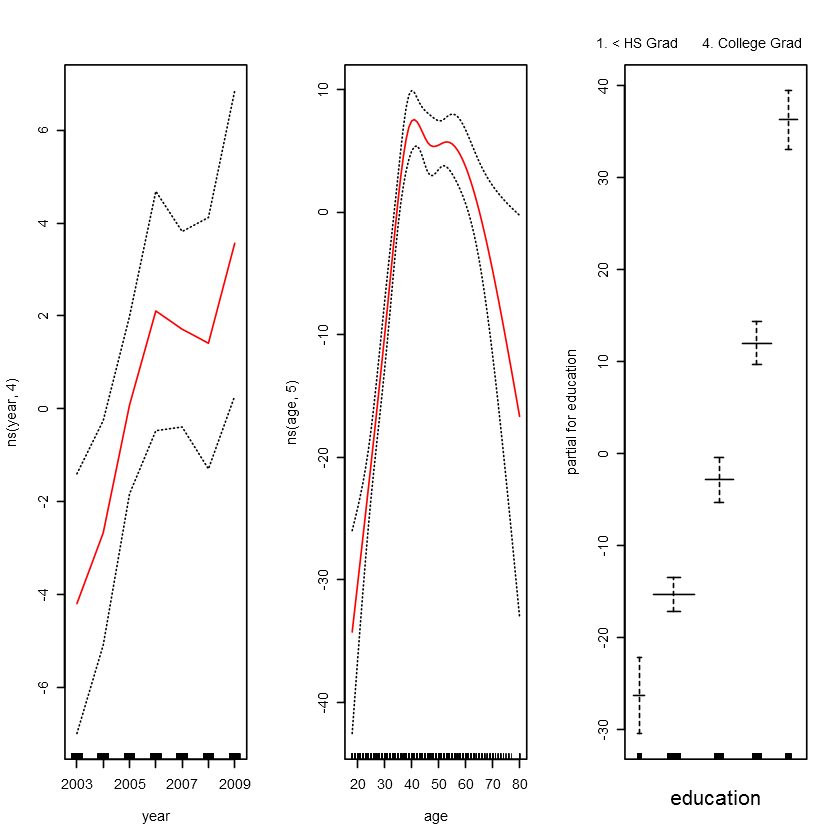

In [52]:
par(mfrow=c(1,3))
plot.gam(gam1, se=TRUE, col="red")

In [57]:
gam.m1=gam(wage~s(age,5)+education,data=Wage)
gam.m2=gam(wage~year+s(age,5)+education,data=Wage)
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)
anova(gam.m1,gam.m2,gam.m3,test="F")

summary(gam.m3)

# The model with year is better, but non linearity with year is not beneficial.
# Model m2 is better.
preds=predict(gam.m2,newdata=Wage)

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
2990,3711731,NA,NA,NA,NA
2989,3693842,1.000000,17889.243,14.477130,0.0001447167
2986,3689770,2.999989,4071.134,1.098212,0.3485661430



Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
---

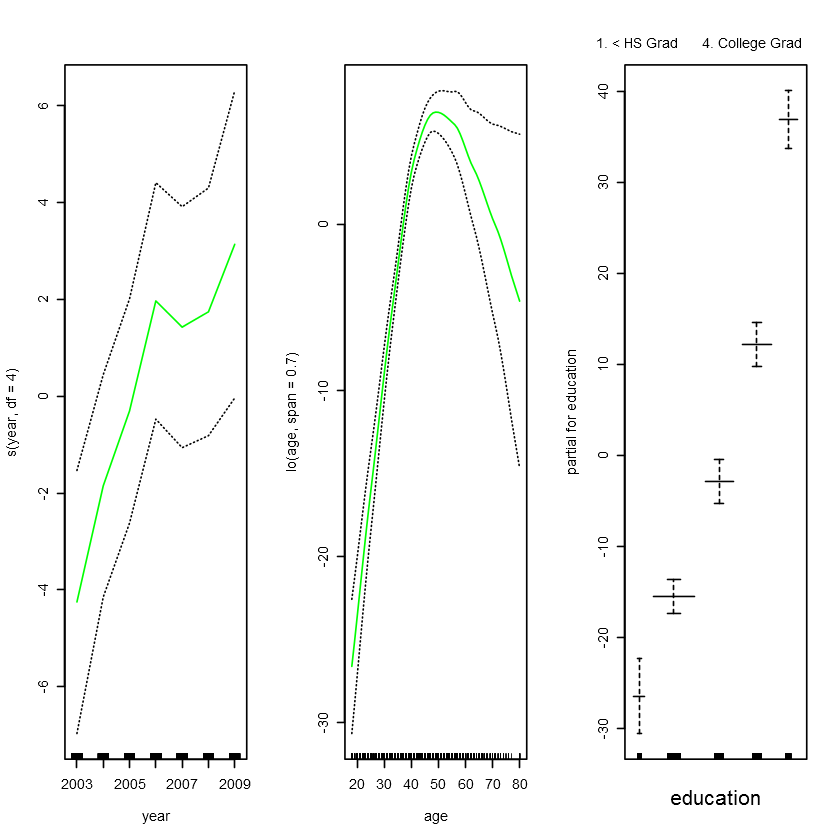

In [59]:
# We can also use local regression fits as building blocks in a GAM, using
# the lo() function.
gam.lo=gam(wage~s(year,df=4)+lo(age,span=0.7)+education,data=Wage)
par(mfrow=c(1,3))
plot.gam(gam.lo, se=TRUE, col="green")

# You can create interraction terms with
#gam.lo.i=gam(wage~lo(year,age,span=0.5)+education,data=Wage)

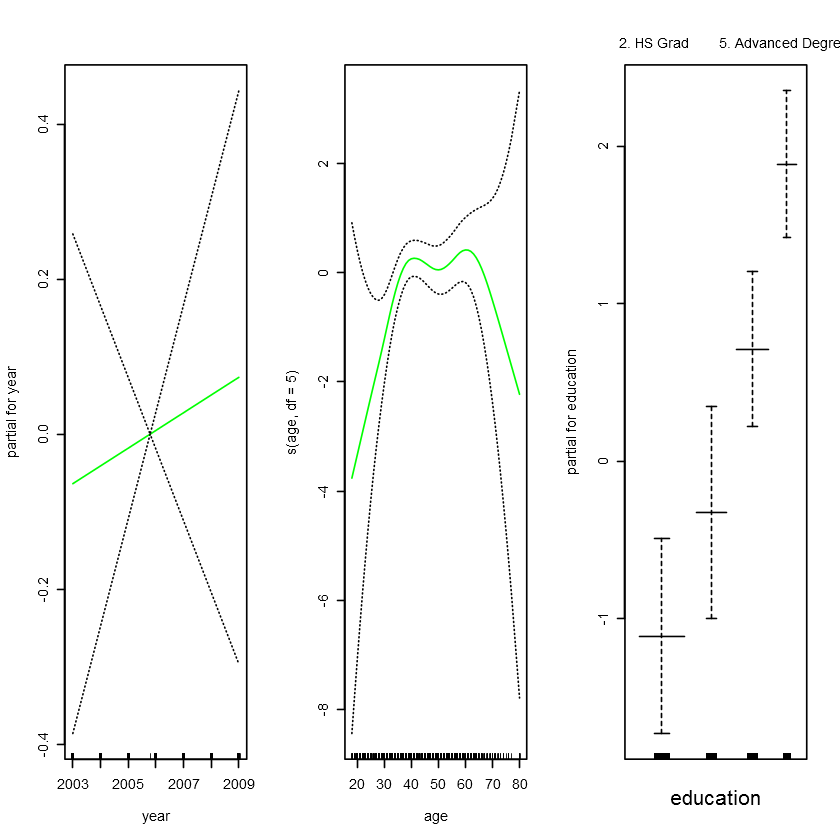

In [60]:
# logistic regression GAM
par(mfrow=c(1,3))
gam.lr.s=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage,subset=(education!="1. < HS Grad"))
plot(gam.lr.s,se=T,col="green")